## Hdip_GABRIEL_VILLASMIL_2024

### Table of Content

- Data Preparation
    - Outliers
- Data Cleaning
- EDA
    - Plots
    - Encoding and Scaling
    - Dimensionality Reduction (PCA and LDA)
    - Feature Engineering
- Statistical Techniques for Data Analytics
    - Probability
    - Descriptive Analysis
    - Normality Test
    - Chi-Square Test (Test 1)
    - T-Test (Test 2)
    - ANOVA (Test 3)
    - Descriptive Analysis conclusion
    - Confidence Interval
    - Inferential Statistics
    - Correlation Analysis
    - Linear Regression
- Machine Learning
    - Supervised Learning
    - Ridge Regression
    - Supervised Learning Conclusion
    - Unsupervised learning
    - Summary
    - Conclusion
- References


## Data Preparation

### Importing libraries and loading data

In [210]:
# ------------------------- Data Preparation ------------------------- #

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report, mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import shapiro, t, ttest_ind, f_oneway, normaltest, chi2_contingency
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, accuracy_score
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier



# Loading dataset
df = pd.read_excel('biking_dataset.xlsx', sheet_name='biking_dataset')

df

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
0,Berlin,Rainy,53.0,Standard,62.0,2.25,High,22.63
1,San Francisco,Cloudy,39.0,Standard,5.0,21.67,Medium,7.87
2,Berlin,Sunny,43.0,Electric,106.0,28.40,High,39.40
3,San Francisco,Cloudy,24.0,Standard,119.0,5.66,Low,37.63
4,New York,Sunny,24.0,Mountain,11.0,25.74,Low,13.12
...,...,...,...,...,...,...,...,...
895,New York,Rainy,55.0,Electric,55.0,28.35,Medium,26.30
896,London,Cloudy,47.0,Mountain,14.0,11.99,High,13.78
897,San Francisco,Sunny,49.0,Mountain,23.0,2.78,High,20.47
898,Chicago,Sunny,19.0,Mountain,110.0,2.27,High,39.62


### Outliers

I will take advantage of both **Histograms** and **Boxplots** to see if there is any outliers in this dataset. Lets see them:

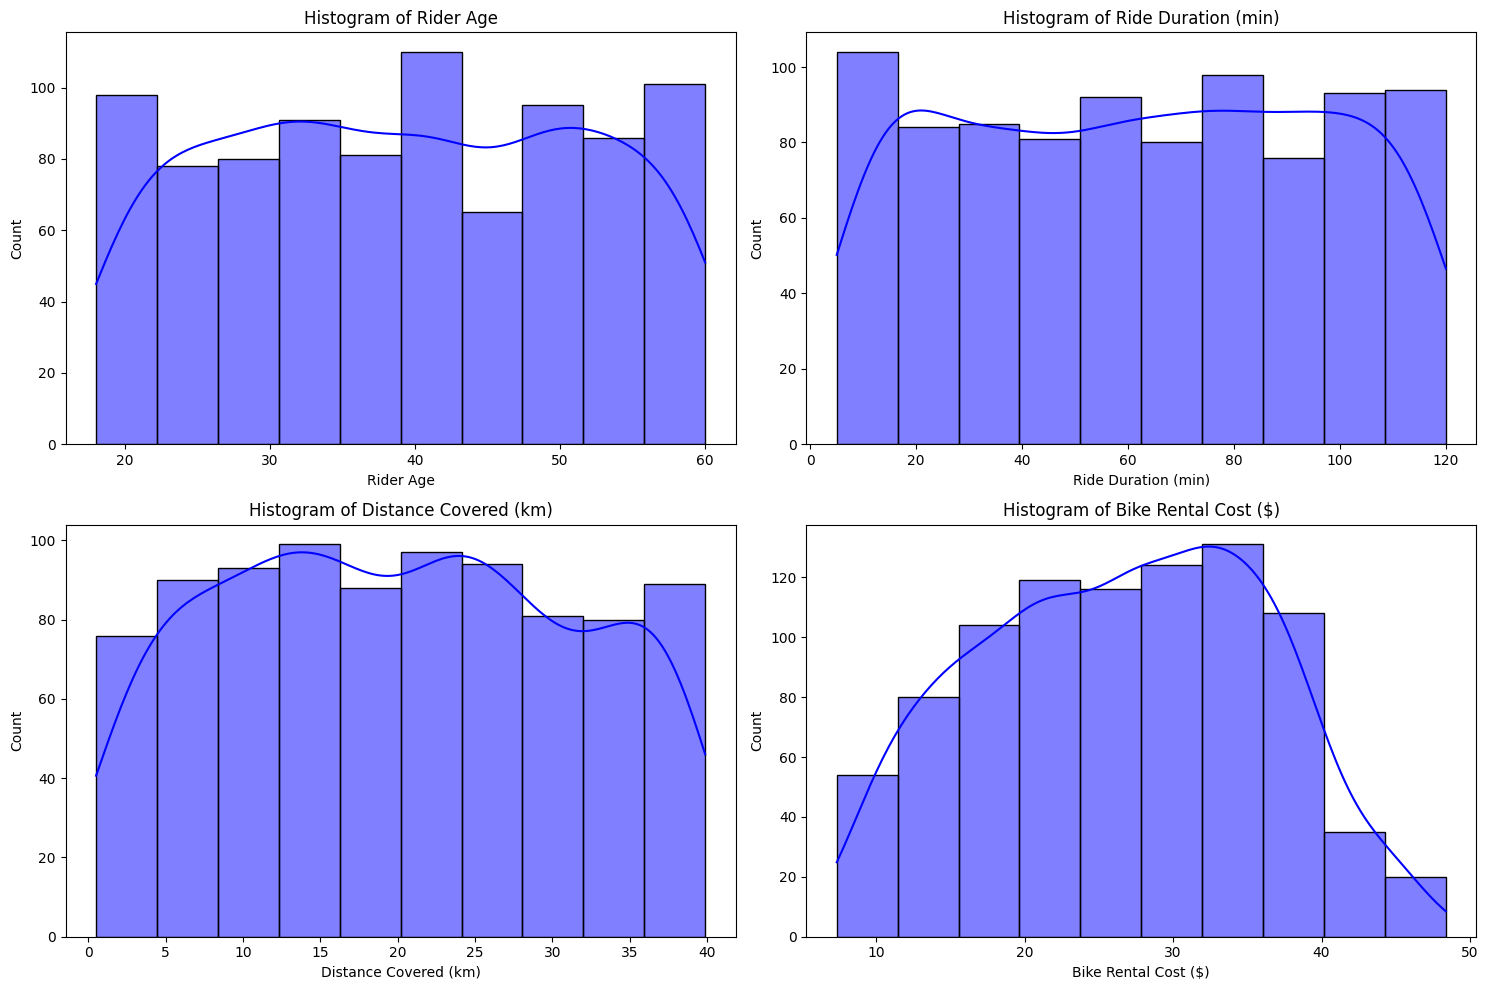

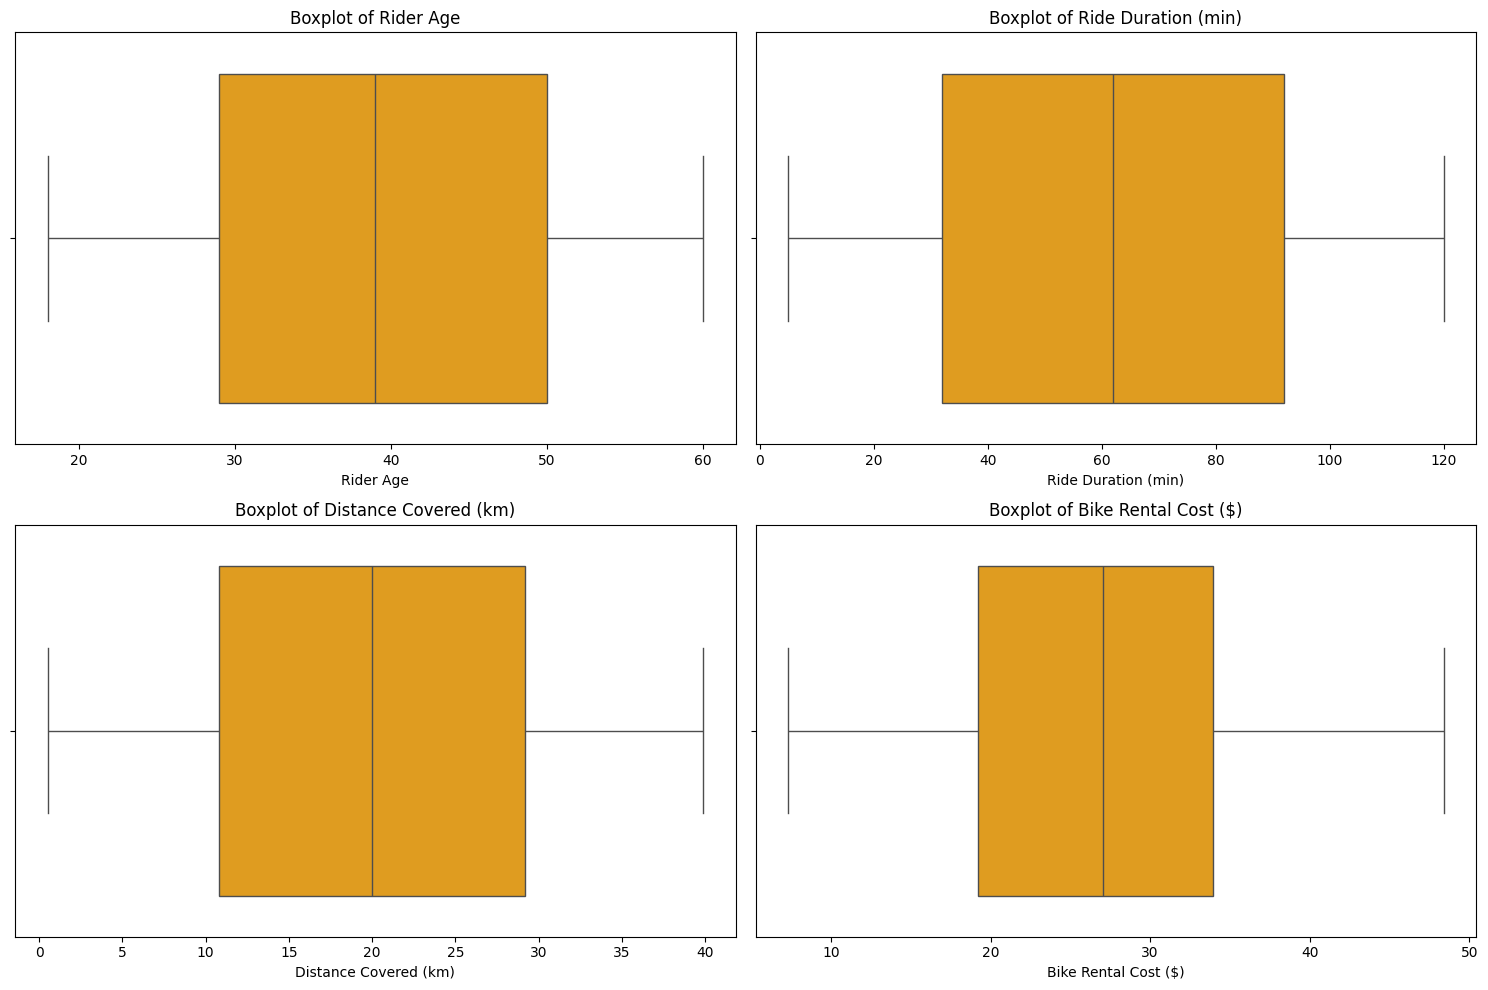

In [211]:
# Histograms
numerical_columns = ["Rider Age", "Ride Duration (min)", "Distance Covered (km)", "Bike Rental Cost ($)"]
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=10, color='blue')
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

#Box plots
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

It does not look like there is outliers in this dataset. However lets continue with Data Preparation as well as clipping some possible out of range data.

In [212]:
# Basic Dataset Characterization
print("Dataset Shape:", df.shape)
print("Column Information:")
print(df.info())

# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Handling Missing data
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Imputing missing values
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Clipping Out-of-range values
df['Rider Age'] = df['Rider Age'].clip(lower=0, upper=100)
df['Bike Rental Cost ($)'] = df['Bike Rental Cost ($)'].clip(lower=0)


Dataset Shape: (900, 8)
Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   890 non-null    object 
 1   Weather Condition      889 non-null    object 
 2   Rider Age              885 non-null    float64
 3   Bike Model             890 non-null    object 
 4   Ride Duration (min)    887 non-null    float64
 5   Distance Covered (km)  887 non-null    float64
 6   Rider Satisfaction     889 non-null    object 
 7   Bike Rental Cost ($)   891 non-null    float64
dtypes: float64(4), object(4)
memory usage: 56.4+ KB
None

Missing Values:
 City                     10
Weather Condition        11
Rider Age                15
Bike Model               10
Ride Duration (min)      13
Distance Covered (km)    13
Rider Satisfaction       11
Bike Rental Cost ($)      9
dtype: int64


In [213]:
# Checking if still missing values 
print("\nMissing Values After Imputation:\n", df.isnull().sum())


Missing Values After Imputation:
 City                     0
Weather Condition        0
Rider Age                0
Bike Model               0
Ride Duration (min)      0
Distance Covered (km)    0
Rider Satisfaction       0
Bike Rental Cost ($)     0
dtype: int64


## Data Cleaning

In [214]:
# ------------------------- Data Cleaning ------------------------- #

# Converting numeric columns
df['Rider Age'] = pd.to_numeric(df['Rider Age'], errors='coerce')
df['Ride Duration (min)'] = pd.to_numeric(df['Ride Duration (min)'], errors='coerce')
df['Distance Covered (km)'] = pd.to_numeric(df['Distance Covered (km)'], errors='coerce')
df['Bike Rental Cost ($)'] = pd.to_numeric(df['Bike Rental Cost ($)'], errors='coerce')


# Converting non-numerical columns to categorical (best practices)
df['City'] = df['City'].astype('category')
df['Weather Condition'] = df['Weather Condition'].astype('category')
df['Bike Model'] = df['Bike Model'].astype('category')
df['Rider Satisfaction'] = df['Rider Satisfaction'].astype('category')

# Checking changes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   City                   900 non-null    category
 1   Weather Condition      900 non-null    category
 2   Rider Age              900 non-null    float64 
 3   Bike Model             900 non-null    category
 4   Ride Duration (min)    900 non-null    float64 
 5   Distance Covered (km)  900 non-null    float64 
 6   Rider Satisfaction     900 non-null    category
 7   Bike Rental Cost ($)   900 non-null    float64 
dtypes: category(4), float64(4)
memory usage: 32.5 KB
None


In [215]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
         Rider Age  Ride Duration (min)  Distance Covered (km)   
count  900.000000           900.000000             900.000000  \
mean    39.264407            62.225479              20.130530   
std     12.270139            33.710026              11.097657   
min     18.000000             5.000000               0.510000   
25%     29.000000            33.000000              11.040000   
50%     39.264407            62.225479              20.130530   
75%     50.000000            92.000000              29.027500   
max     60.000000           120.000000              39.870000   

       Bike Rental Cost ($)  
count            900.000000  
mean              26.581470  
std                9.390862  
min                7.330000  
25%               19.282500  
50%               26.970000  
75%               33.935000  
max               48.380000  


## EDA

### Plots

The goal of selecting this variety of charts is to identify some hidden patterns in the dataset.

Results will be mostly covered in the report.

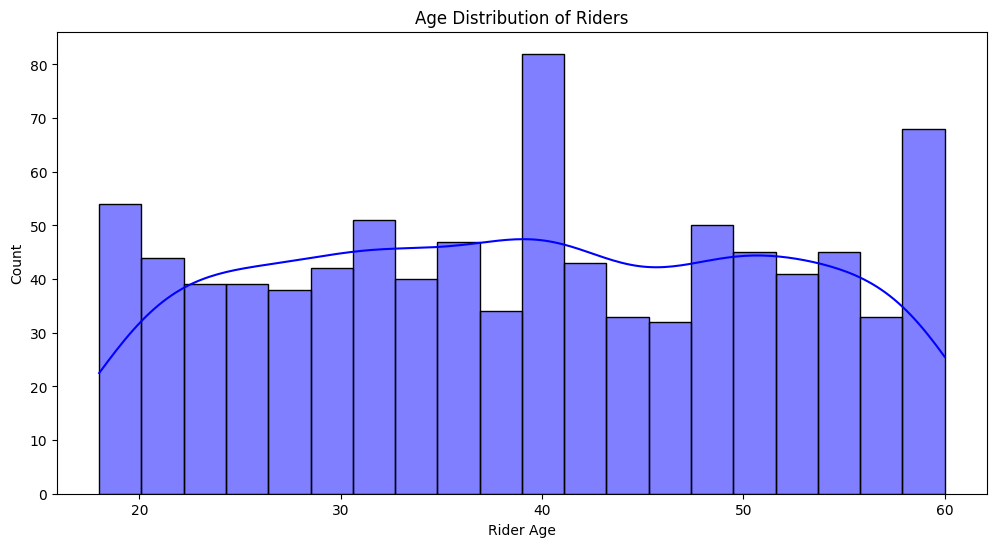

In [216]:
# ----------------------------- EDA ----------------------------- #

plt.figure(figsize=(12, 6))
sns.histplot(df['Rider Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution of Riders')
plt.show()



I chose this one to see the distribution of Ages around this dataset

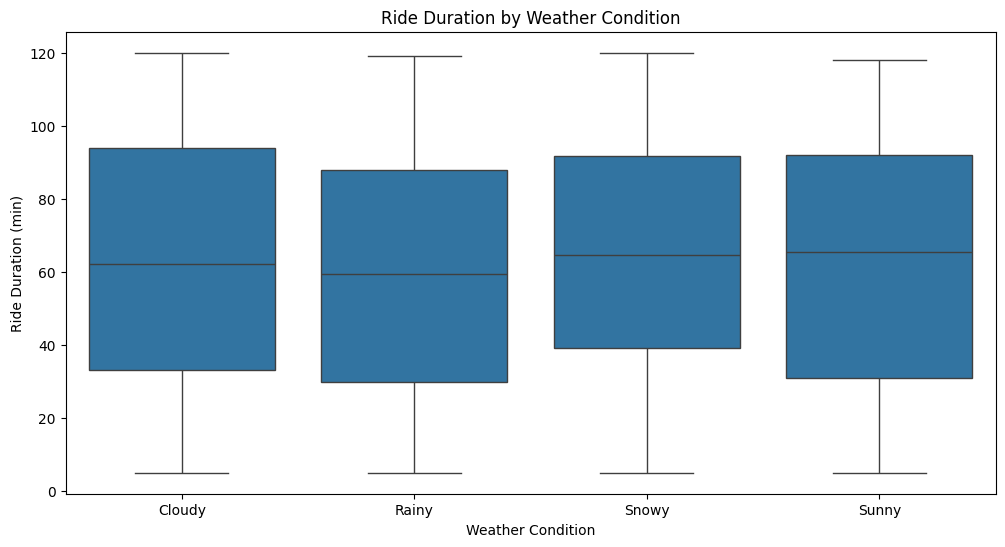

In [217]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather Condition', y='Ride Duration (min)', data=df)
plt.title('Ride Duration by Weather Condition')
plt.show()



As we can see in this boxplot ride duration actually vary from weather conditions, making the snowy weather the least users on the road

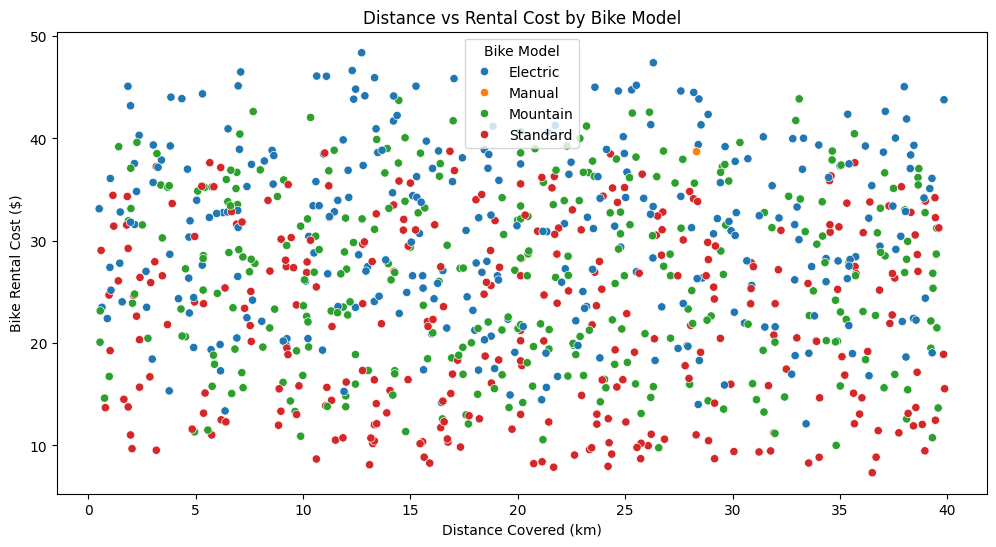

In [218]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Distance Covered (km)', y='Bike Rental Cost ($)', hue='Bike Model', data=df)
plt.title('Distance vs Rental Cost by Bike Model')
plt.show()

Electric bikes (blue dots) makes the most profit regardless the time spend on the road, this is interesting

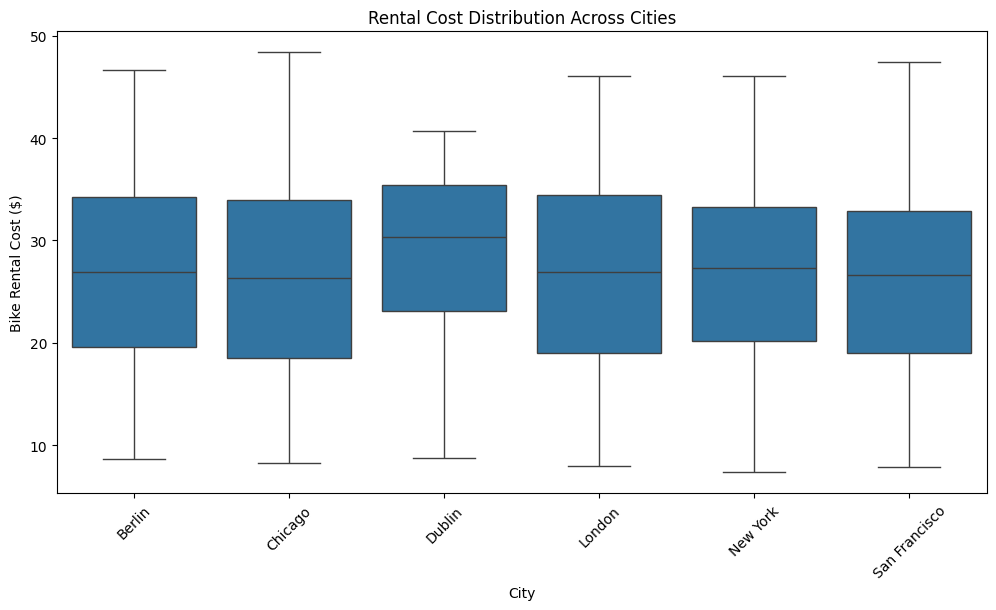

In [219]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Bike Rental Cost ($)', data=df)
plt.title('Rental Cost Distribution Across Cities')
plt.xticks(rotation=45)
plt.show()

This has to be something weird, how could dublin, where the more of the users are, the city that spends the less of money?

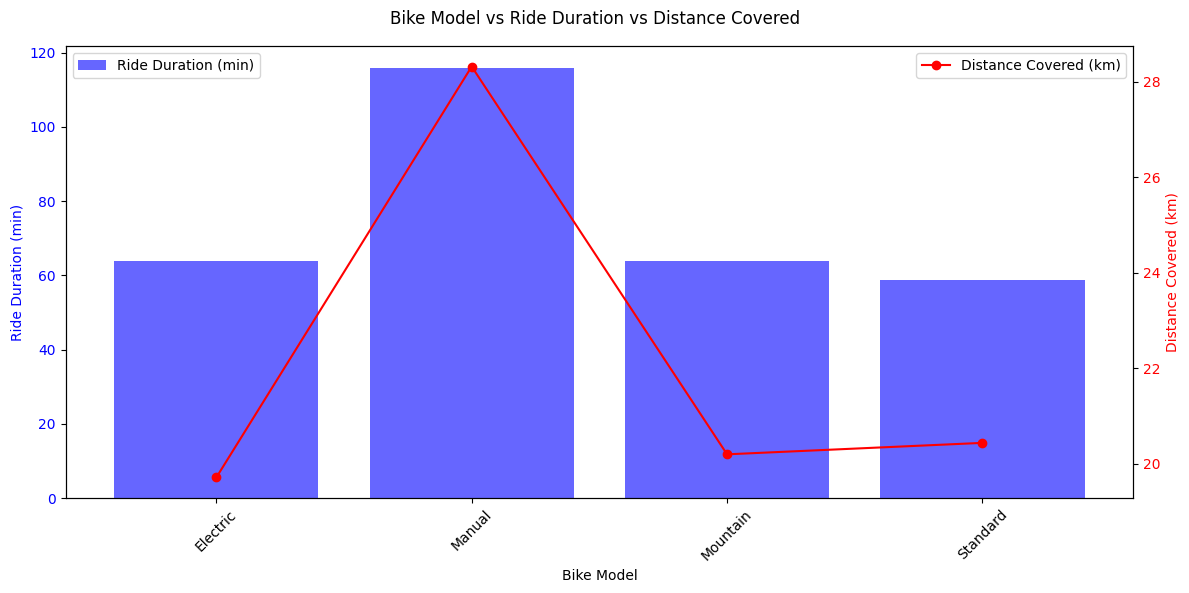

In [220]:
# Calculating mean ride duration and distance covered for each bike
eda_data = df.groupby('Bike Model').agg({
    'Ride Duration (min)': 'mean',
    'Distance Covered (km)': 'mean'
}).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for Ride Duration
ax1.bar(eda_data['Bike Model'], eda_data['Ride Duration (min)'], color='blue', alpha=0.6, label='Ride Duration (min)')
ax1.set_ylabel('Ride Duration (min)', color='blue')
ax1.set_xlabel('Bike Model')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(len(eda_data['Bike Model'])))
ax1.set_xticklabels(eda_data['Bike Model'], rotation=45)

# Line plot for Distance Covered
ax2 = ax1.twinx()
ax2.plot(eda_data['Bike Model'], eda_data['Distance Covered (km)'], color='red', marker='o', label='Distance Covered (km)')
ax2.set_ylabel('Distance Covered (km)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and Legend
fig.suptitle('Bike Model vs Ride Duration vs Distance Covered')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


Manual bikes are the ones used for the most period of time, we have to study that more to see if we can target niche 

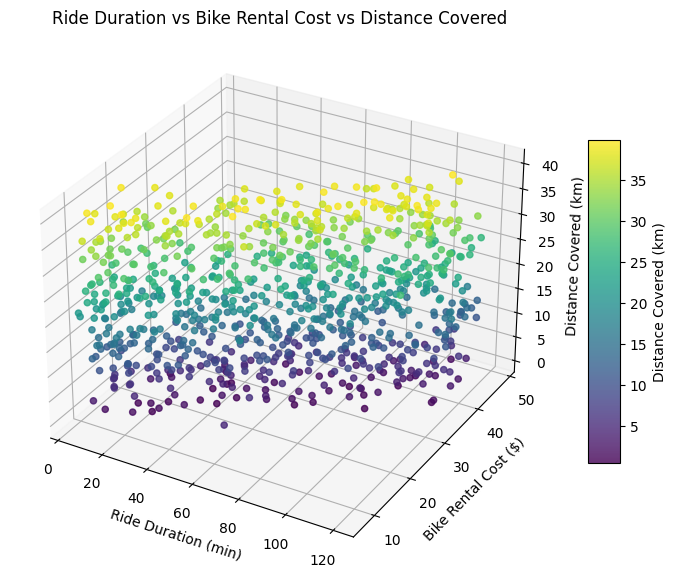

In [221]:
# Ride Duration vs Bike Rental Cost vs Distance Covered
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(df['Ride Duration (min)'], 
                df['Bike Rental Cost ($)'], 
                df['Distance Covered (km)'], 
                c=df['Distance Covered (km)'], 
                cmap='viridis', 
                alpha=0.8)

# Labeling axes
ax.set_xlabel('Ride Duration (min)')
ax.set_ylabel('Bike Rental Cost ($)')
ax.set_zlabel('Distance Covered (km)')
plt.title('Ride Duration vs Bike Rental Cost vs Distance Covered')

# Adding color bar
cb = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=10)
cb.set_label('Distance Covered (km)')

# Plotting
plt.show()

Positive correlation among these three features, so we need to make more people spend more time riding more distances... maybe some tourist packages there?

C:\Users\gabri\AppData\Local\Temp\ipykernel_5312\3714699935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Rider Satisfaction', y='Rider Age', palette='coolwarm')


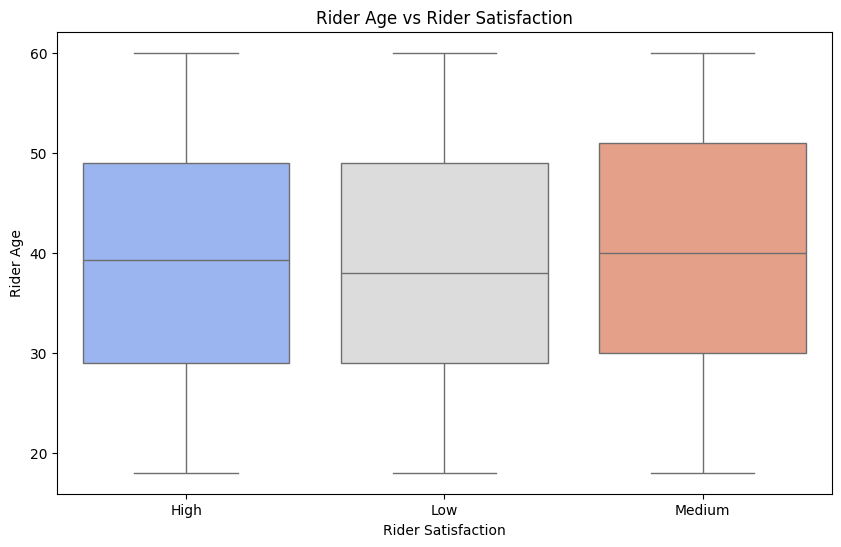

In [222]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rider Satisfaction', y='Rider Age', palette='coolwarm')

# Titles and labels
plt.title('Rider Age vs Rider Satisfaction')
plt.xlabel('Rider Satisfaction')
plt.ylabel('Rider Age')

# Show plot
plt.show()


These box plots show us actually the demographics from 50 to 30 are the ones giving feedback

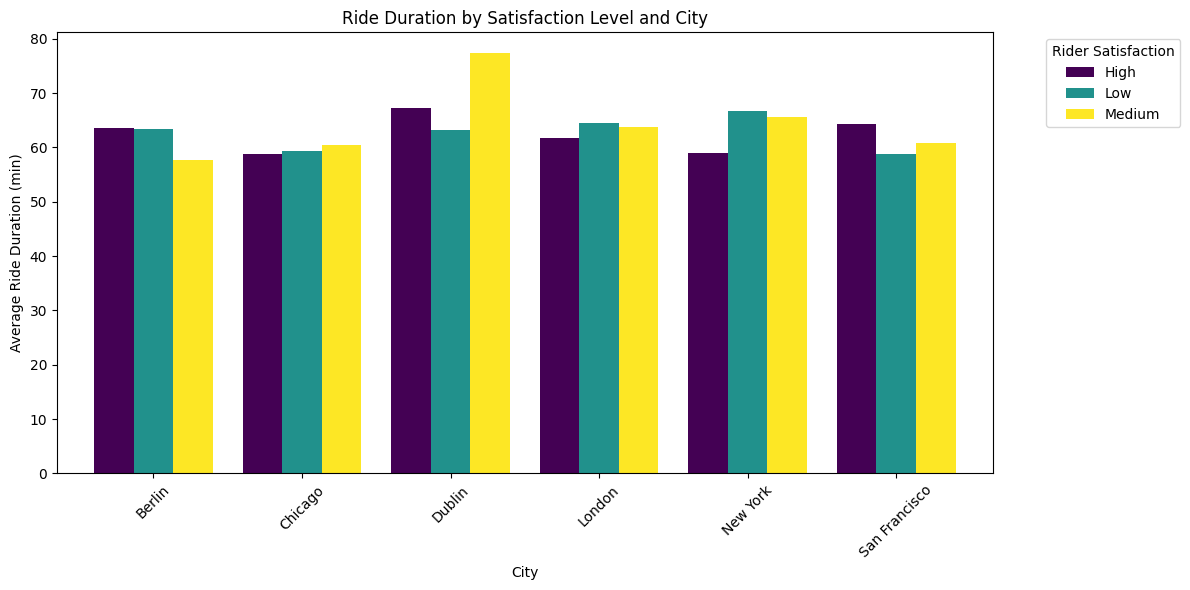

In [223]:
# Group data by City and Rider Satisfaction to calculate mean ride duration
eda_data = df.groupby(['City', 'Rider Satisfaction'])['Ride Duration (min)'].mean().unstack()

# Plotting ready
eda_data.plot(kind='bar', figsize=(12, 6), colormap='viridis', width=0.8)

# Labels and Title
plt.title('Ride Duration by Satisfaction Level and City')
plt.xlabel('City')
plt.ylabel('Average Ride Duration (min)')
plt.xticks(rotation=45)
plt.legend(title='Rider Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plotting
plt.tight_layout()
plt.show()


We clearly need to see what is happening in dublin

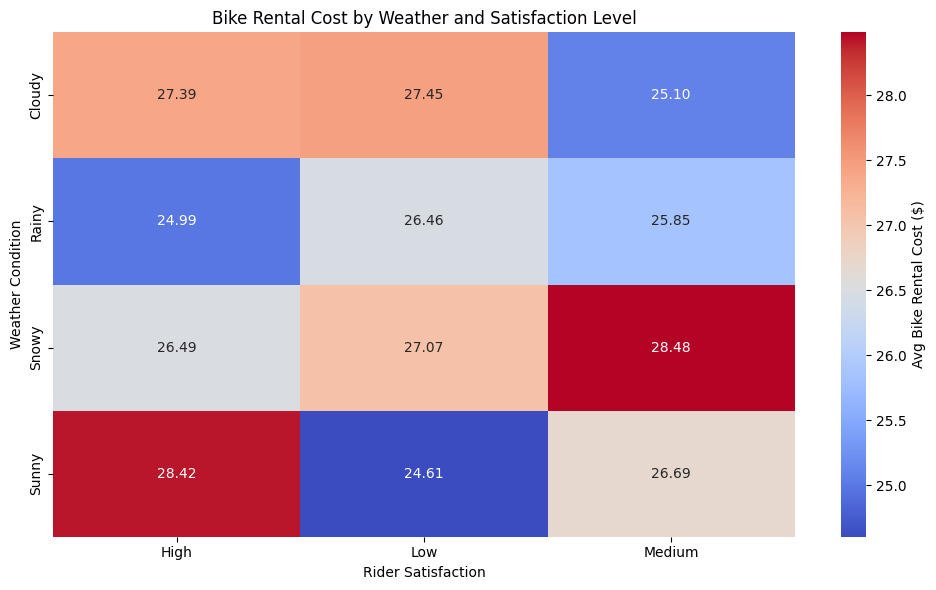

In [224]:
# Grouping data by Weather Condition and Rider Satisfaction. Mean Bike Rental Cost
eda_data = df.groupby(['Weather Condition', 'Rider Satisfaction'])['Bike Rental Cost ($)'].mean().unstack()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(eda_data, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Avg Bike Rental Cost ($)'})

# Labels and Title
plt.title('Bike Rental Cost by Weather and Satisfaction Level')
plt.xlabel('Rider Satisfaction')
plt.ylabel('Weather Condition')

# Plotting
plt.tight_layout()
plt.show()


I liked the fact that people are the most satisfied both in snowy and sunny days, interesting (red boxes)...

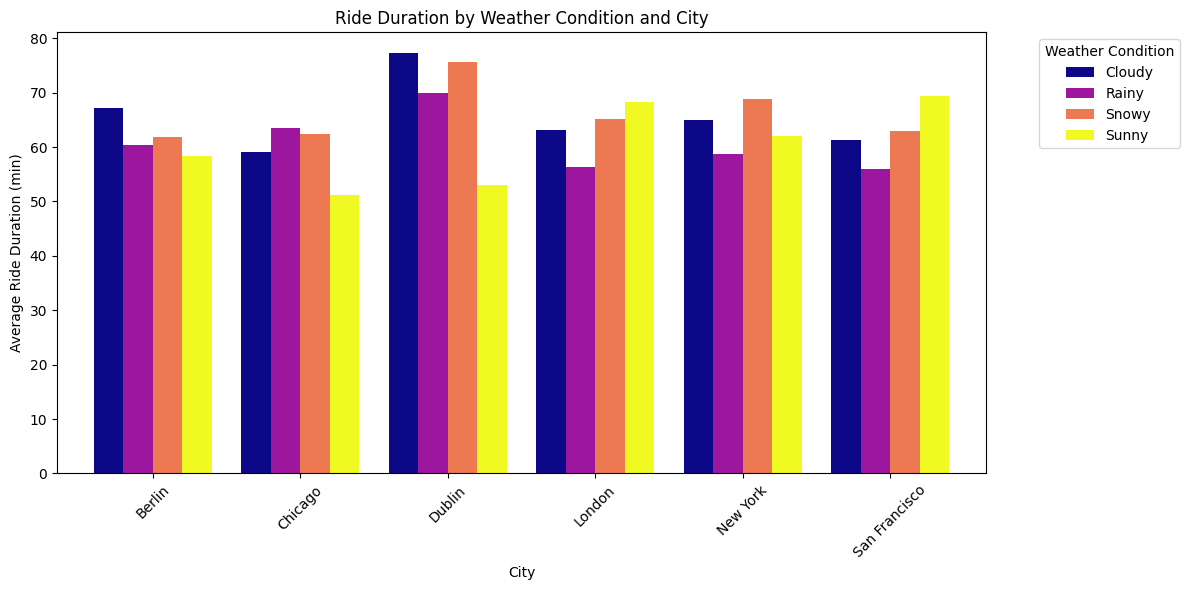

In [225]:
# Grouping data by City and Weather Condition. Mean ride duration
eda_data = df.groupby(['City', 'Weather Condition'])['Ride Duration (min)'].mean().unstack()

# Bar chart
eda_data.plot(kind='bar', figsize=(12, 6), colormap='plasma', width=0.8)

# Labels and Title
plt.title('Ride Duration by Weather Condition and City')
plt.xlabel('City')
plt.ylabel('Average Ride Duration (min)')
plt.xticks(rotation=45)
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plotting
plt.tight_layout()
plt.show()


As we saw in previous charts, weather affects our profitability

### Encoding and Scaling

In [226]:
# Encoding
encoder = OneHotEncoder()
encoded_cols = encoder.fit_transform(df[categorical_cols]).toarray()
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Processed encoded data
processed_df = pd.concat([df[numerical_cols], encoded_df], axis=1)

# Scaling data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_df)


###  Dimensionality Reduction (PCA and LDA)

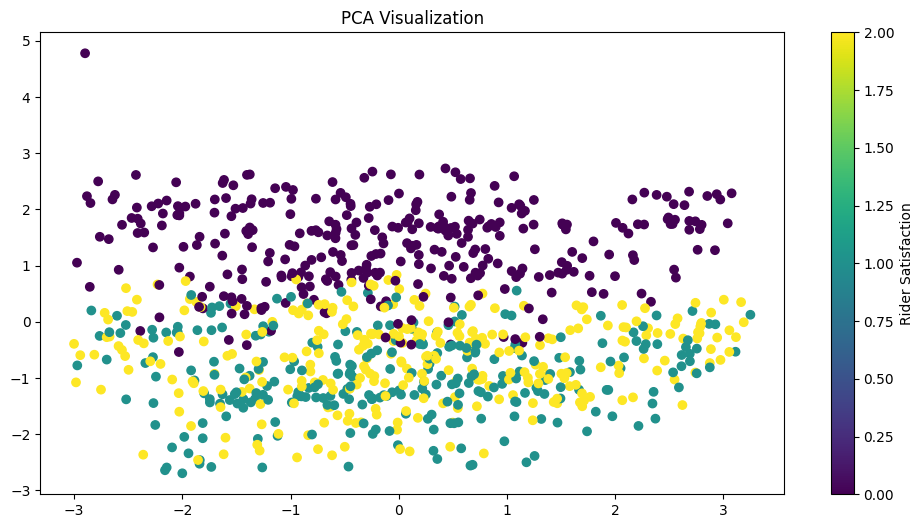

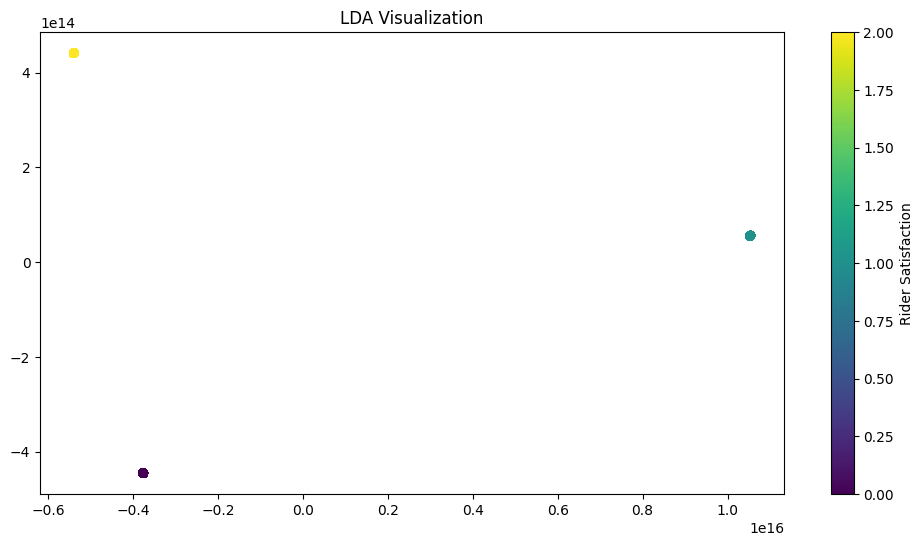


PCA focuses on variance, making it ideal for unsupervised learning.
LDA optimizes class separability, making it more suitable for supervised classification.


In [227]:
#PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

#LDA
lda = LDA(n_components=2)
lda_result = lda.fit_transform(scaled_data, df['Rider Satisfaction'].astype('category').cat.codes)

# Plotting PCA results
plt.figure(figsize=(12, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Rider Satisfaction'].astype('category').cat.codes, cmap='viridis')
plt.title('PCA Visualization')
plt.colorbar(label='Rider Satisfaction')
plt.show()

#Plotting LDA results
plt.figure(figsize=(12, 6))
plt.scatter(lda_result[:, 0], lda_result[:, 1], c=df['Rider Satisfaction'].astype('category').cat.codes, cmap='viridis')
plt.title('LDA Visualization')
plt.colorbar(label='Rider Satisfaction')
plt.show()

#Comparing
print("\nPCA focuses on variance, making it ideal for unsupervised learning.")
print("LDA optimizes class separability, making it more suitable for supervised classification.")


With that being said, lets try a **DecisionTree** on the LDA data. Why a DecissionTree?  Because as its name states is a classifier model and by experience, a good one.

In [228]:
# Rider Satisfaction  as label
labels = df['Rider Satisfaction'].astype('category').cat.codes

# Splitting LDA data into set
X_train, X_test, y_train, y_test = train_test_split(lda_result, labels, test_size=0.3, random_state=42)

# Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy on LDA Data:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Decision Tree Accuracy on LDA Data: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        83
           2       1.00      1.00      1.00        79

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



a Decission Tree will work nice on this dataset if we continue with LDA

In [229]:
processed_df

,Rider Age,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($),City_Berlin,City_Chicago,City_Dublin,City_London,City_New York,City_San Francisco,...,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Bike Model_Electric,Bike Model_Manual,Bike Model_Mountain,Bike Model_Standard,Rider Satisfaction_High,Rider Satisfaction_Low,Rider Satisfaction_Medium
0,53.0,62.0,2.25,22.63,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,39.0,5.0,21.67,7.87,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,43.0,106.0,28.40,39.40,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,24.0,119.0,5.66,37.63,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.0,11.0,25.74,13.12,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,55.0,55.0,28.35,26.30,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
896,47.0,14.0,11.99,13.78,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
897,49.0,23.0,2.78,20.47,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
898,19.0,110.0,2.27,39.62,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


Nice **processed data**, still when dealing with Categorical values we will come back to the default 'df' for simplicity, (it will not affect model performance) lets see a quick example with Feature Engineering below

### Feature Engineering
Quick analysis from a feature selection

Lets stop for a second, this processed_df gave me an idea:

1. Lets Feature Engineering ['Distance Covered (km)'], ['Bike Rental Cost ($)'] and ['Bike Model']
2. Lest image 3 clusters and run a Kmeans
3. Lets plot the results
4. Evaluate
5. Get rid off everything
6. Come back later to see if our clusters were valid.

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


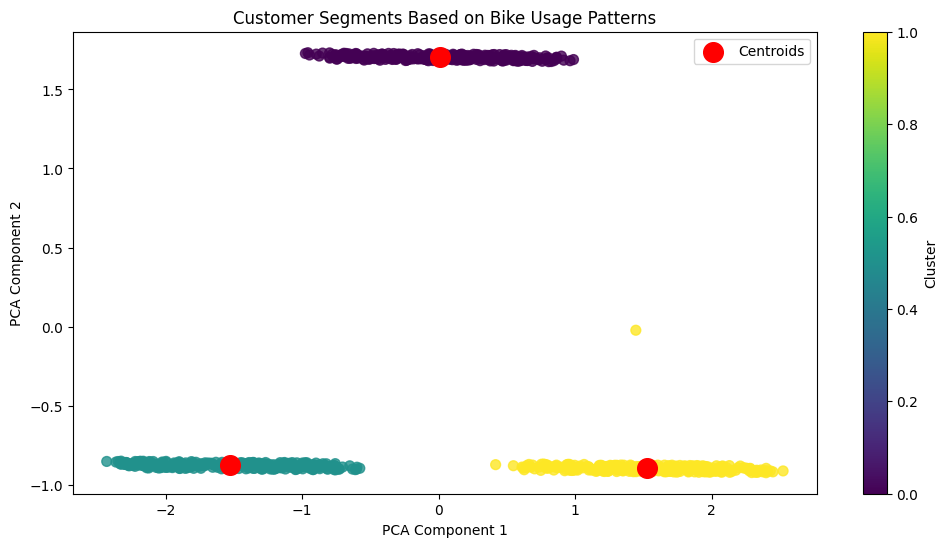

Silhouette Score for Clustering: 0.50


In [230]:
# Lets Feature Engineering ['Distance Covered (km)'], ['Bike Rental Cost ($)'] and ['Bike Model']
clustering_features = processed_df[['Distance Covered (km)', 'Bike Rental Cost ($)']]

# Concat with the original Df for categorical values simplicity
clustering_features = pd.concat([clustering_features, pd.get_dummies(df['Bike Model'])], axis=1)

# Scaling
scaled_features = scaler.fit_transform(clustering_features)

# PCA for dimension reduction
pca_for_clustering = PCA(n_components=2)
pca_clustering_result = pca_for_clustering.fit_transform(scaled_features)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_clustering_result)

df['Cluster'] = clusters

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(
    pca_clustering_result[:, 0], 
    pca_clustering_result[:, 1], 
    c=clusters, cmap='viridis', s=50, alpha=0.8
)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, label='Centroids')
plt.title('Customer Segments Based on Bike Usage Patterns')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

# Silhouette Score for evaluation
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score for Clustering: {silhouette_avg:.2f}")


Surprisinlgy not a bad clustering. We can spot three clusters here:

In [231]:
df['Cluster'] = kmeans.labels_
cluster_summary = df.groupby('Cluster').agg({
    'Distance Covered (km)': ['mean', 'std'],
    'Bike Rental Cost ($)': ['mean', 'std'],
    'Bike Model': lambda x: x.mode()[0], 
    'Rider Age': ['mean', 'std'],
    'City': lambda x: x.mode()[0]
})
cluster_summary


Distance Covered (km)            Bike Rental Cost ($)             
                         mean        std                 mean       std   
Cluster                                                                   
0                   20.200854  10.921346            26.575367  8.589587  \
1                   20.440583  11.119310            22.174363  8.963281   
2                   19.744951  11.283344            31.024829  8.503081   

        Bike Model  Rider Age                 City  
          <lambda>       mean        std  <lambda>  
Cluster                                             
0         Mountain  38.077438  12.673595    London  
1         Standard  39.236775  11.699604  New York  
2         Electric  40.531502  12.318794    London

In [232]:
df = df.drop(columns=['Cluster'])

Lets get rid off this 'Cluster' column and see if in the future our cluster gest validated with Unsupervised learning

## Statistical Techniques for Data Analytics

we will have four differents plots, the first one is a Violin Plot, later on we will se the rest:

1. Violin Plot
2. Histogram Plot
3. Q-Q Plot
4. Correlation Matrix Plot

C:\Users\gabri\AppData\Local\Temp\ipykernel_5312\2716468747.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="City", y="Ride Duration (min)", data=df, palette="muted")


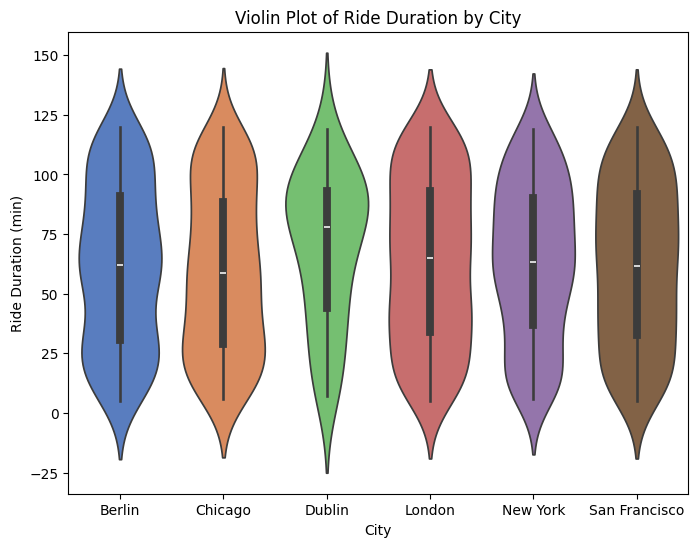

In [233]:
# ------------------------- Statistical Techniques for Data Analytics ------------------------- #

# Violin Plot for Distribution Analysis
plt.figure(figsize=(8, 6))
sns.violinplot(x="City", y="Ride Duration (min)", data=df, palette="muted")
plt.title("Violin Plot of Ride Duration by City")
plt.show()


Data seems to be normally distributed, lets wait, and do not give any conclusion unttil we get some P values

### Probability

Probability of having a High Rider Satisfaction

In [234]:
satisfaction_probs = df["Rider Satisfaction"].value_counts(normalize=True)
print("Probability of Rider Satisfaction Levels:")
satisfaction_probs


Probability of Rider Satisfaction Levels:


Rider Satisfaction
High      0.366667
Medium    0.332222
Low       0.301111
Name: proportion, dtype: float64

36% probability of a Rider having a High Satisfaction level

### Descriptive Analysis

In [235]:
# Descriptive Analysis

# Numerical colums
df.describe()

,Rider Age,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($)
count,900.000000,900.000000,900.000000,900.000000
mean,39.264407,62.225479,20.130530,26.581470
std,12.270139,33.710026,11.097657,9.390862
min,18.000000,5.000000,0.510000,7.330000
25%,29.000000,33.000000,11.040000,19.282500
50%,39.264407,62.225479,20.130530,26.970000
75%,50.000000,92.000000,29.027500,33.935000
max,60.000000,120.000000,39.870000,48.380000


In [236]:
# Categorical colums
df.describe(include='category')

,City,Weather Condition,Bike Model,Rider Satisfaction
count,900,900,900,900
unique,6,4,4,3
top,London,Rainy,Mountain,High
freq,196,256,308,330


In [237]:
# Measures of Central Tendency

# Mean, Median, Mode for numerical columns
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
mode_values = df.mode().iloc[0]

In [238]:
mean_values, median_values

(Rider Age                39.264407
 Ride Duration (min)      62.225479
 Distance Covered (km)    20.130530
 Bike Rental Cost ($)     26.581470
 dtype: float64,
 Rider Age                39.264407
 Ride Duration (min)      62.225479
 Distance Covered (km)    20.130530
 Bike Rental Cost ($)     26.970000
 dtype: float64)

In [239]:
mode_values

City                       London
Weather Condition           Rainy
Rider Age                    36.0
Bike Model               Mountain
Ride Duration (min)          40.0
Distance Covered (km)    20.13053
Rider Satisfaction           High
Bike Rental Cost ($)     26.58147
Name: 0, dtype: object

In [240]:
# Measures of Dispersion

# Variance, standard deviation, and coefficient of variation
variance = df.select_dtypes(include='number').var()
std_dev = df.select_dtypes(include='number').std()
mean_values = df.select_dtypes(include='number').mean()
coeff_variation = (std_dev / mean_values) * 100
iqr_values = df.select_dtypes(include='number').quantile(0.75) - df.select_dtypes(include='number').quantile(0.25)


In [241]:
variance, std_dev

(Rider Age                 150.556317
 Ride Duration (min)      1136.365856
 Distance Covered (km)     123.157991
 Bike Rental Cost ($)       88.188283
 dtype: float64,
 Rider Age                12.270139
 Ride Duration (min)      33.710026
 Distance Covered (km)    11.097657
 Bike Rental Cost ($)      9.390862
 dtype: float64)

In [242]:
coeff_variation

Rider Age                31.250031
Ride Duration (min)      54.173992
Distance Covered (km)    55.128489
Bike Rental Cost ($)     35.328601
dtype: float64

In [243]:
iqr_values

Rider Age                21.0000
Ride Duration (min)      59.0000
Distance Covered (km)    17.9875
Bike Rental Cost ($)     14.6525
dtype: float64

In [244]:
# Computation of measures of shape of Distribution

# Skewness and Kurtosis
skewness = df.select_dtypes(include='number').skew()
kurt = df.select_dtypes(include='number').kurtosis()

In [245]:
skewness

Rider Age                0.002243
Ride Duration (min)     -0.011111
Distance Covered (km)    0.047917
Bike Rental Cost ($)    -0.052358
dtype: float64

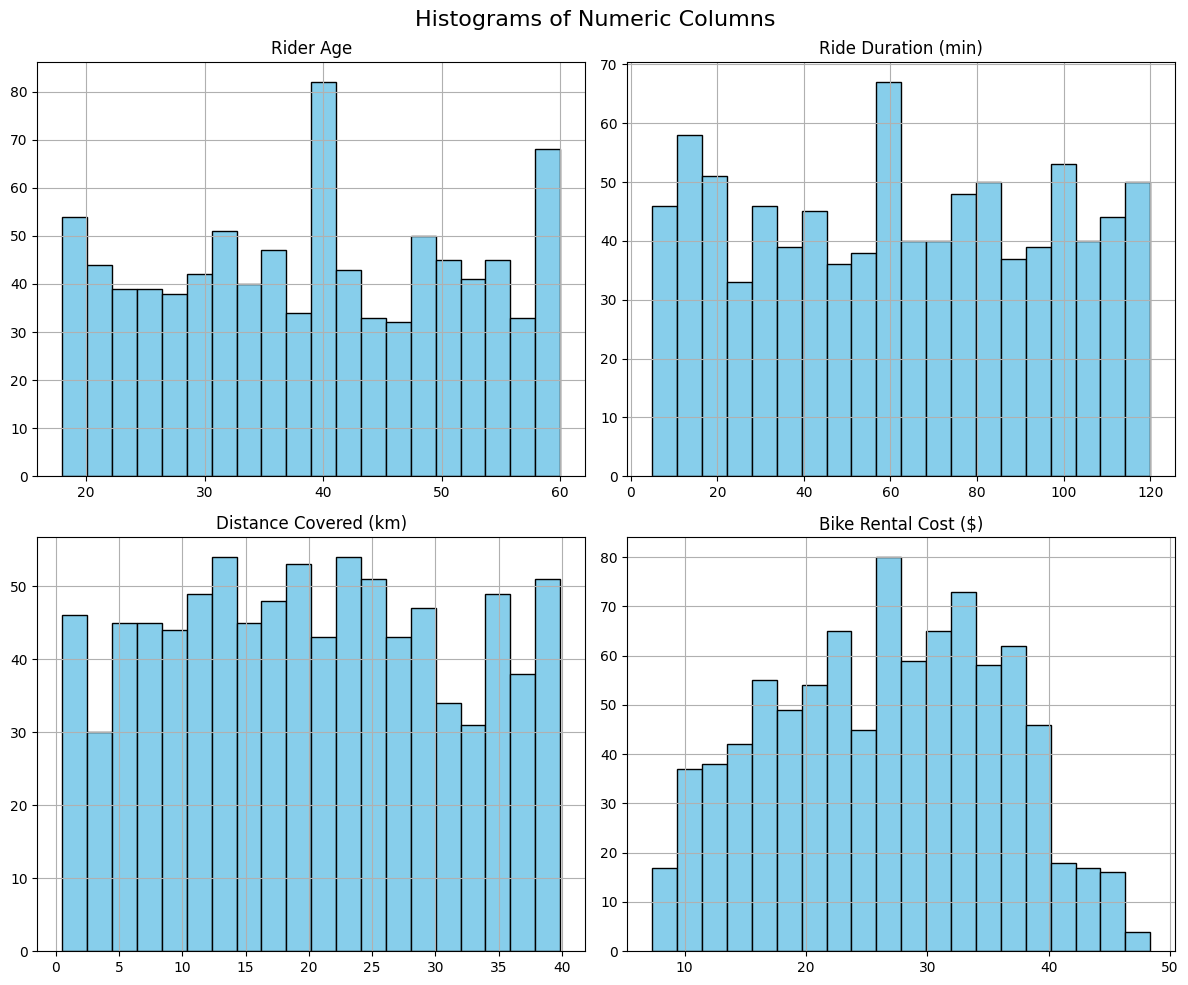

In [246]:
# Plotting histogram for each numeric column

df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')

# Title and layout
plt.suptitle('Histograms of Numeric Columns', fontsize=16)
plt.tight_layout()
plt.show()

No skewness found in this dataset, slightly found in both **Bike Rental Cost ($) (-0.052358)** and **Distance Covered (km) (0.047917)** but too small to say there is

In [247]:
kurt

Rider Age               -1.157283
Ride Duration (min)     -1.206514
Distance Covered (km)   -1.104400
Bike Rental Cost ($)    -0.878336
dtype: float64

### Normality Test

In [248]:
# Storing normality test results in dict
normality_results = {} 

# Normality test
for col in df.select_dtypes(include=['float64', 'int64', 'Int64']).columns:
    try:
        # Run normality test after the if
        normality_results[col] = normaltest(df[col].dropna())

    except ValueError:
        print(f"Warning: {col} could not be converted to float.")

normality_results


{'Rider Age': NormaltestResult(statistic=476.06772891385884, pvalue=4.1995829151913204e-104),
 'Ride Duration (min)': NormaltestResult(statistic=683.9285072698581, pvalue=3.067691183541787e-149),
 'Distance Covered (km)': NormaltestResult(statistic=340.60159002033964, pvalue=1.0947235562939602e-74),
 'Bike Rental Cost ($)': NormaltestResult(statistic=106.2986735623753, pvalue=8.270586708122702e-24)}

In [249]:
# P-values
p_values = [result.pvalue for result in normality_results.values()]

# Mean of all p-values
mean_p_value = sum(p_values) / len(p_values)

print(f"Mean p-value: {mean_p_value}\n")

# Checking
if mean_p_value >= 0.05:
    print("Sample appears to be normally distributed.")
else:
    print("Sample does not appear to be normally distributed.")

Mean p-value: 2.0676466770306756e-24

Sample does not appear to be normally distributed.


### Chi-Square Test

Lets try this, remember when we mentioned that we need to study what is happening in Dublin?

Lets see if there is a Statistical assosiation between 'Rider Satisfaction' and 'City' using Chi-square

In [250]:
# Contingency table between "City" and "Rider Satisfaction"
contingency_table = pd.crosstab(df["City"], df["Rider Satisfaction"])

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Results
print("Chi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
if p < 0.05: 
    print("Reject the null hypothesis: There is a significant association between Rider Satisfaction and City.")
else:
    print("Fail to reject the null hypothesis: No significant association between Rider Satisfaction and City.")

Chi-Square Statistic: 5.783441856503389
P-Value: 0.8331174450889574
Degrees of Freedom: 10
Expected Frequencies:
 [[62.7        51.49       56.81      ]
 [61.6        50.58666667 55.81333333]
 [10.63333333  8.73222222  9.63444444]
 [71.86666667 59.01777778 65.11555556]
 [61.6        50.58666667 55.81333333]
 [61.6        50.58666667 55.81333333]]
Fail to reject the null hypothesis: No significant association between Rider Satisfaction and City.


### T- Test

In this example we will see if there is a siginicant difference in the **mean** between **three different cities**

In [251]:
# Groupping rental costs by cities
berlin_cost = df[df["City"] == "Berlin"]["Bike Rental Cost ($)"]
sf_cost = df[df["City"] == "San Francisco"]["Bike Rental Cost ($)"]
ny_cost = df[df["City"] == "New York"]["Bike Rental Cost ($)"]

# ANOVA
f_stat, p_val = f_oneway(berlin_cost, sf_cost, ny_cost)

# Results
print("F-Statistic:", f_stat)
print("P-Value:", p_val)

# Interpretation
if p_val < 0.05:
    print("Reject the null hypothesis: At least one city has a significantly different bike rental cost.")
else:
    print("Fail to reject the null hypothesis: No significant difference in bike rental costs across these cities.")


F-Statistic: 0.17363819237351852
P-Value: 0.8406512432271543
Fail to reject the null hypothesis: No significant difference in bike rental costs across these cities.


### ANOVA

In this case we will see if there is a significant difference between **Bike Model** and **Rider Age**

In [252]:
# Remember the 3 bikes models
standard_age = df[df["Bike Model"] == "Standard"]["Rider Age"]
electric_age = df[df["Bike Model"] == "Electric"]["Rider Age"]
mountain_age = df[df["Bike Model"] == "Mountain"]["Rider Age"]

# ANOVA
f_stat, p_val = f_oneway(standard_age, electric_age, mountain_age)

# Results
print("F-Statistic:", f_stat)
print("P-Value:", p_val)

# Interpretation
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in Rider Age across Bike Models.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Rider Age across Bike Models.")


F-Statistic: 3.0327038851663755
P-Value: 0.048680091065133935
Reject the null hypothesis: There is a significant difference in Rider Age across Bike Models.


### Descriptive Analysis conclusion

After seeing:
- The Measures of Central Tendency (Mean, Median, Mode for numerical columns)
- Measures of Dispersion (Variance, standard deviation, and coefficient of variation for numeric columns)
- Computation of measures of shape of Distribution
- Normality test and p-values results

I will continue this analysis focussing in the column **'Distance Covered (km)'** because overall it was the one with the best statistics results.

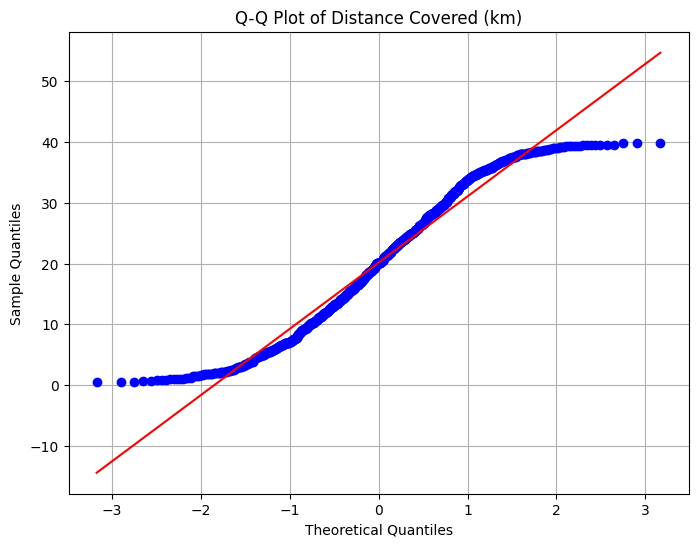

In [253]:
# Lets run some validations

# Creating a Q-Q plot for the 'Distance Covered (km)'
plt.figure(figsize=(8, 6))
stats.probplot(df['Distance Covered (km)'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Distance Covered (km)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

This Q-Q plot looks fantastic!, as we said, I will continue with 'Distance Covered (km)' column.

### Confidence Intervals

In [254]:
# Feature engineering data by weather condition
sunny_data = df[df['Weather Condition'] == 'Sunny']['Distance Covered (km)']
rainy_data = df[df['Weather Condition'] == 'Rainy']['Distance Covered (km)']

# Mean and standard error for Sunny
mean_sunny = np.mean(sunny_data)
sem_sunny = np.std(sunny_data, ddof=1) / np.sqrt(len(sunny_data))
conf_interval_sunny = t.interval(0.95, len(sunny_data)-1, loc=mean_sunny, scale=sem_sunny)

# Mean and standard error for Rainy
mean_rainy = np.mean(rainy_data)
sem_rainy = np.std(rainy_data, ddof=1) / np.sqrt(len(rainy_data))
conf_interval_rainy = t.interval(0.95, len(rainy_data)-1, loc=mean_rainy, scale=sem_rainy)

# Results
print("\nConfidence Interval for 'Sunny' Weather:", conf_interval_sunny)
print("Confidence Interval for 'Rainy' Weather:", conf_interval_rainy)


Confidence Interval for 'Sunny' Weather: (19.17113576560331, 22.196964777596442)
Confidence Interval for 'Rainy' Weather: (17.61892734331236, 20.332807965312217)


### Inferential Statistics

Lets check if we validate or fail to validate our null hypothesis

In [255]:
# T- TEST
stat, p = ttest_ind(sunny_data, rainy_data)
print("\nT-Test Results: Statistic=", stat, ", p=", p)

# ANOVA
stat, p = f_oneway(sunny_data, rainy_data)
print("\nANOVA Results: Statistic=", stat, ", p=", p)


T-Test Results: Statistic= 1.6600180267603515 , p= 0.09757219418187364

ANOVA Results: Statistic= 2.755659849169334 , p= 0.09757219418184522


In this case Both the T-Test and ANOVA tell us that there are no statistically significant differences between sunny_data and rainy_data.

### Correlation Analysis

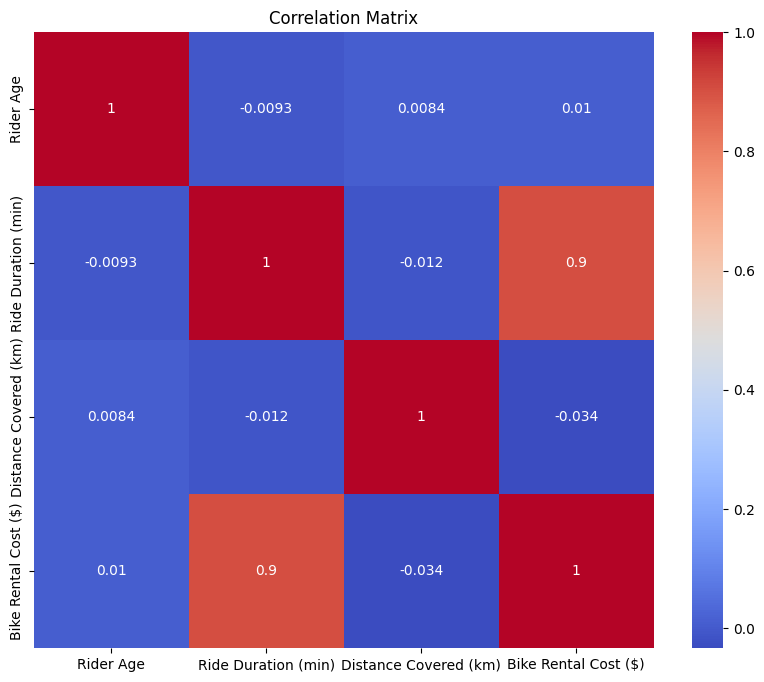

In [256]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Linear Regression 

In [257]:
# Only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numeric_df.corr()

# Lets get our target variable
dependent_variable = 'Bike Rental Cost ($)' 
correlations = correlation_matrix[dependent_variable].drop(dependent_variable).abs()

print("Correlations with the target variable:")
print(correlations.sort_values(ascending=False))


Correlations with the target variable:
Ride Duration (min)      0.904871
Distance Covered (km)    0.033724
Rider Age                0.010302
Name: Bike Rental Cost ($), dtype: float64


In [258]:
# Features and Target
X = numeric_df.drop(columns=['Bike Rental Cost ($)']) 
y = numeric_df['Bike Rental Cost ($)']

# Standardizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training
model = LinearRegression()
model.fit(X_scaled, y)

coefficients = pd.Series(model.coef_, index=X.columns)
print("Feature Importance (Linear Regression Coefficients):")
print(coefficients.sort_values(ascending=False))


Feature Importance (Linear Regression Coefficients):
Ride Duration (min)      8.491860
Rider Age                0.177670
Distance Covered (km)   -0.216433
dtype: float64


**Conclusion**: with linear regression we confirm what we saw in the Correlation matrix. **Bike Rental Cost** can helps us to predict **Ride Duration** using machine learning

It makes sense because the more your ride, the more you consume

## Machine Learning

We will split this part in two

- Supervised Learning
- Unsupervised Learning

Why? Supervised learning fell short for this analysis, maybe it was not model's fault but human's. I was not able to accurately predict nothing from supervised learning but unsupervised... lets see!

### Supervised learning
Chosen as we aim to predict a dependent variable 'Distance Covered (km)' based on known features.

Having **Rider Age Cost** and **Bike Rental Cost** this great correlation lets continue using LinerRegression with them:

Intercept: 26.562201343024537
Coefficient: 0.003756928023326304
Mean Squared Error: 93.16499177335835
R-squared: -0.004190484161483488


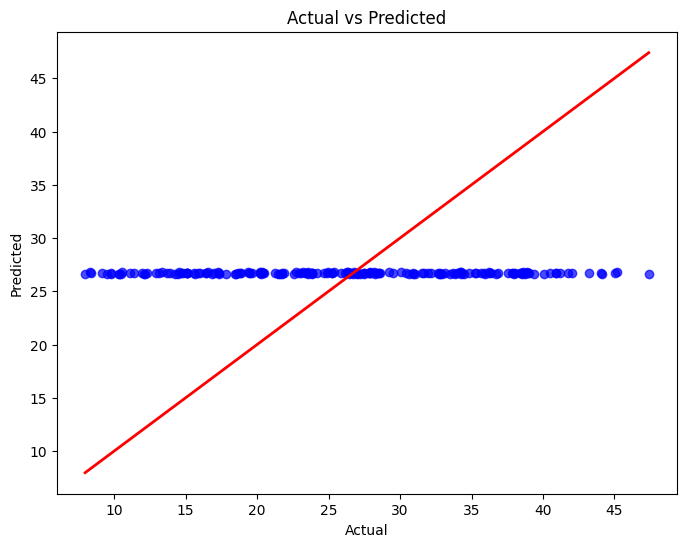

In [259]:
# ------------------------------------------ Machine Learning ------------------------------- #


# Features and desired Target
feature_column = 'Rider Age' 
target_column = 'Bike Rental Cost ($)'

X = processed_df[[feature_column]]
y = processed_df[target_column]

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Results
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


Based on this poor performance, LinearRegression will not give us accurate predictions in **Rider Age Cost** and **Bike Rental Cost**

Lets try now a tuned **RandomForestRegressor**

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error (MSE): 99.46
Root Mean Squared Error (RMSE): 9.97
Mean Absolute Error (MAE): 8.34
R² Score: -0.07


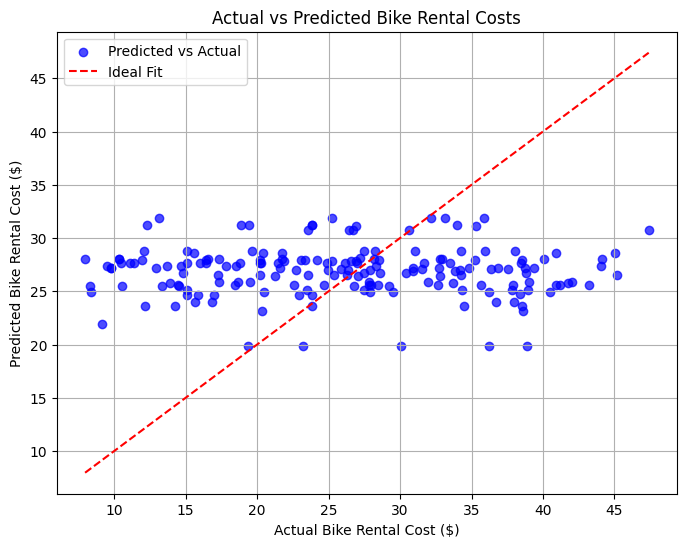

In [260]:
# Lets use GridSearchCV for Hyperparameter tuning 
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Cross-validation setup
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV  hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Trainnig model with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Actual vs. Predicted values plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Bike Rental Cost ($)')
plt.ylabel('Predicted Bike Rental Cost ($)')
plt.title('Actual vs Predicted Bike Rental Costs')
plt.legend()
plt.grid(True)
plt.show()



In [261]:
# Features and Target
X = processed_df[['Distance Covered (km)']]
y = processed_df['Bike Rental Cost ($)']

# Hyperparameters tuning for GridSearchCV
models = {
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    },
    'SVR': {
        'model': SVR(),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    'Ridge': {
        'model': Ridge(),
        'params': {'alpha': [0.1, 1, 10]}
    }
}

# Data splits
splits = [(0.2, 0.8), (0.3, 0.7)]
results = []

# K-Fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# running the algos
for test_size, train_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    for model_name, model_data in models.items():
        # GridSearchCV
        grid = GridSearchCV(model_data['model'], model_data['params'], cv=kfold, scoring='neg_mean_squared_error')
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        
        y_pred = best_model.predict(X_test)
        
        # Evaluation
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        
        # Storing results
        results.append({
            'Model': model_name,
            'Train/Test Split': f"{int(train_size*100)}/{int(test_size*100)}",
            'Best Parameters': grid.best_params_,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2,
            'MAPE': mape
        })



In [262]:
# Passing to a df for visuals
results_df = pd.DataFrame(results)
results_df

,Model,Train/Test Split,Best Parameters,MSE,RMSE,MAE,R²,MAPE
0,Random Forest,80/20,"{'max_depth': 10, 'n_estimators': 200}",98.433919,9.921387,8.324089,-0.060982,42.067677
1,SVR,80/20,"{'C': 0.1, 'kernel': 'linear'}",93.923660,9.691422,8.124501,-0.012368,42.812779
2,Ridge,80/20,{'alpha': 10},93.113261,9.649521,8.104275,-0.003633,42.015302
3,Random Forest,70/30,"{'max_depth': 10, 'n_estimators': 50}",98.398992,9.919627,8.288663,-0.063250,43.191501
4,SVR,70/30,"{'C': 0.1, 'kernel': 'linear'}",94.927121,9.743055,8.173366,-0.025735,44.158399
5,Ridge,70/30,{'alpha': 10},93.600294,9.674725,8.121069,-0.011398,43.251364


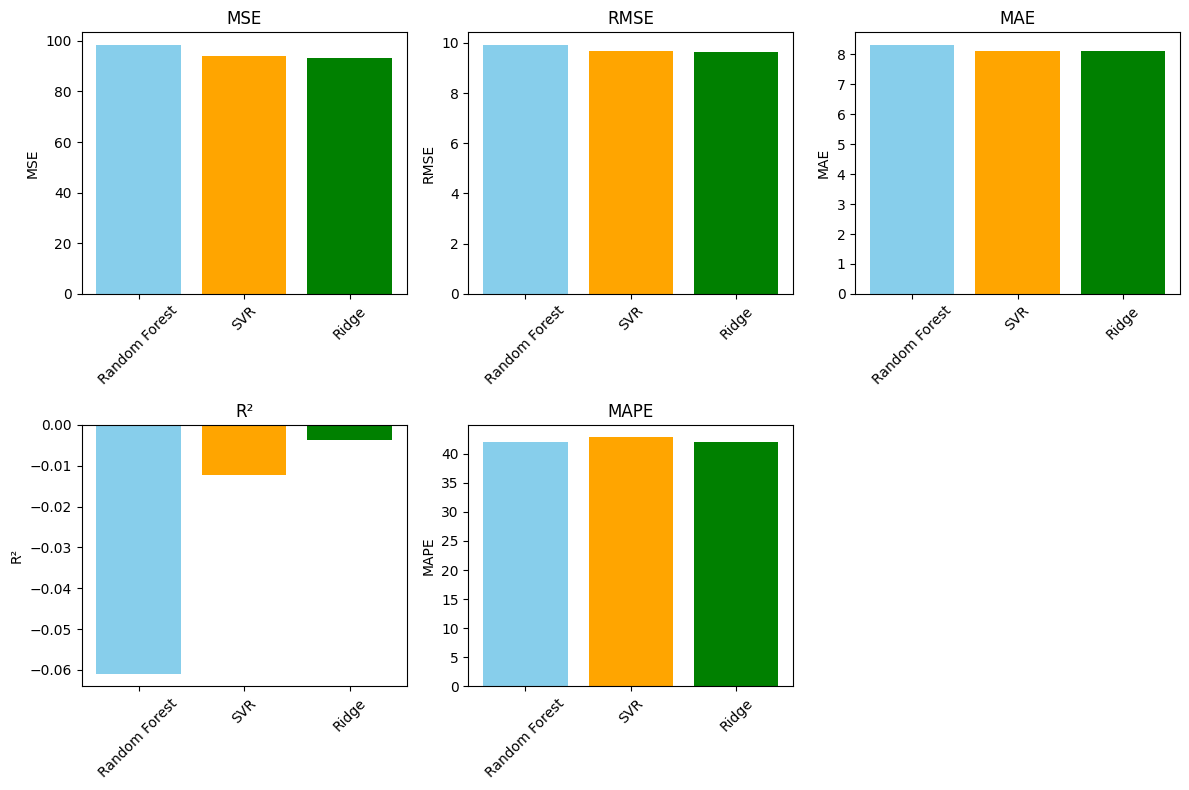

In [263]:
# Lets keep only rows with "80/20" Train/Test Split just for simplicity
filtered_df = results_df[results_df["Train/Test Split"] == "80/20"]

# Plotting
plt.figure(figsize=(12, 8))

# Metrics
metrics = ["MSE", "RMSE", "MAE", "R²", "MAPE"]

# Bar chart for each metric
for i, metric in enumerate(metrics, start=1):
    plt.subplot(2, 3, i)
    plt.bar(filtered_df["Model"], filtered_df[metric], color=['skyblue', 'orange', 'green'])
    plt.title(metric)
    plt.ylabel(metric)
    plt.xticks(rotation=45)

# Plotting
plt.tight_layout()
plt.show()

None of them seems to have a great performance but **Ridge** seems to outperform others.

### Ridge
Lets test if this ML to see if it actually can predict something that makes sense. Lets see **Rider Age** vs **Distance Covered** to see if we can target some users with specials promos

In [264]:
# Features and Target
X = processed_df[['Rider Age']]
y = processed_df['Distance Covered (km)']

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression model
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)


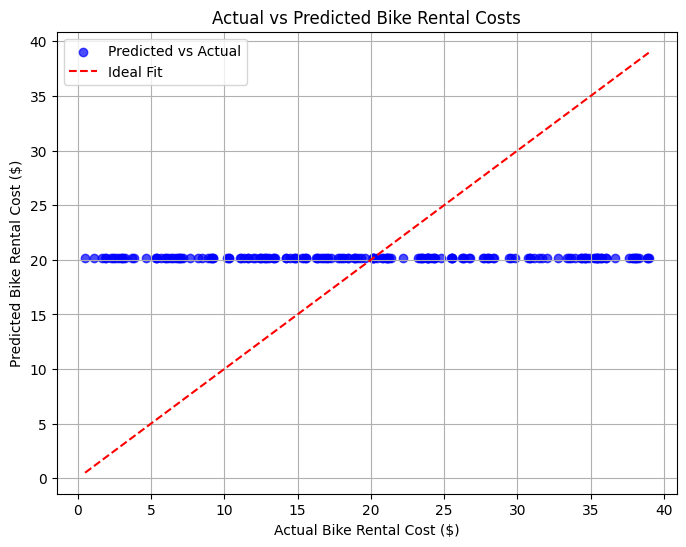

In [265]:
# Plotting it
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Bike Rental Cost ($)')
plt.ylabel('Predicted Bike Rental Cost ($)')
plt.title('Actual vs Predicted Bike Rental Costs')
plt.legend()
plt.grid(True)
plt.show()


### Supervised Learning Conclusion:

The four selected models performed more or less the same in this dataset.

- Linear Regression
- Randon Forest Regression
- SVR
- Ridge Regressor


After trying multime times, with multiple models, with multiple paramethers I was not able to fit a model to this dataset, but actually we knew that in advance, in our descriptive analysis we saw that this dataset **was not normally distributed** and almost everything had poor statistisc metrics, with that being said lets give a chance to the unknow and lest run some ML with unsupervised learning.

### Unsupervised Learning
Used to cluster things that I did not see

In [266]:
# Features for unsupervised learning
X = processed_df[['Rider Age', 'Distance Covered (km)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

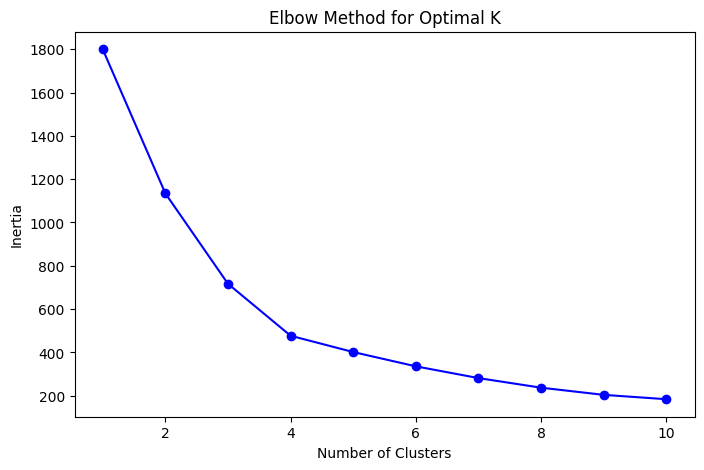

In [267]:
# Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


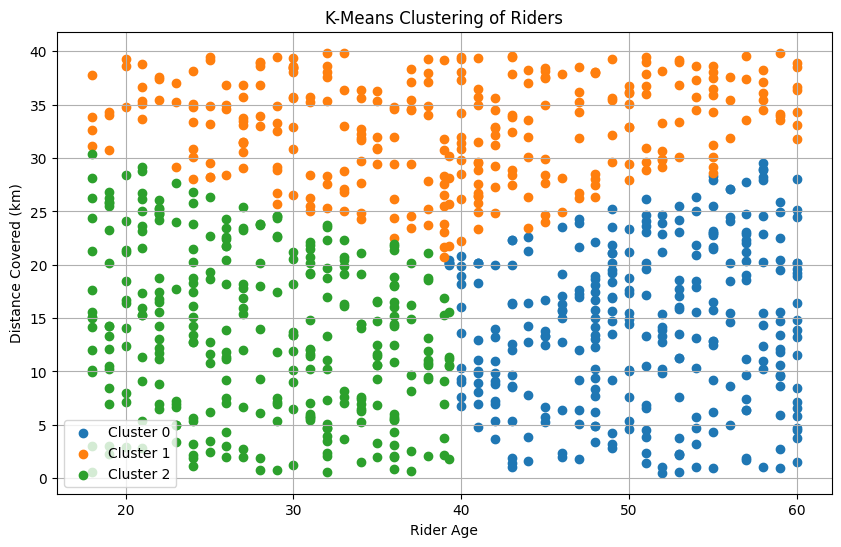

In [268]:
# Lets pick 3 clusters from the elbow
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
processed_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=['Rider Age', 'Distance Covered (km)'])
cluster_df

# Plotting
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    clustered_data = processed_df[processed_df['Cluster'] == cluster]
    plt.scatter(clustered_data['Rider Age'], clustered_data['Distance Covered (km)'], label=f'Cluster {cluster}')
plt.xlabel('Rider Age')
plt.ylabel('Distance Covered (km)')
plt.title('K-Means Clustering of Riders')
plt.legend()
plt.grid(True)
plt.show()

Remember the 3 clusters we made before in Feature Engineering part? Thesa are the clusters the machine was finding!

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Bike Usage by Cluster (with Percentages):


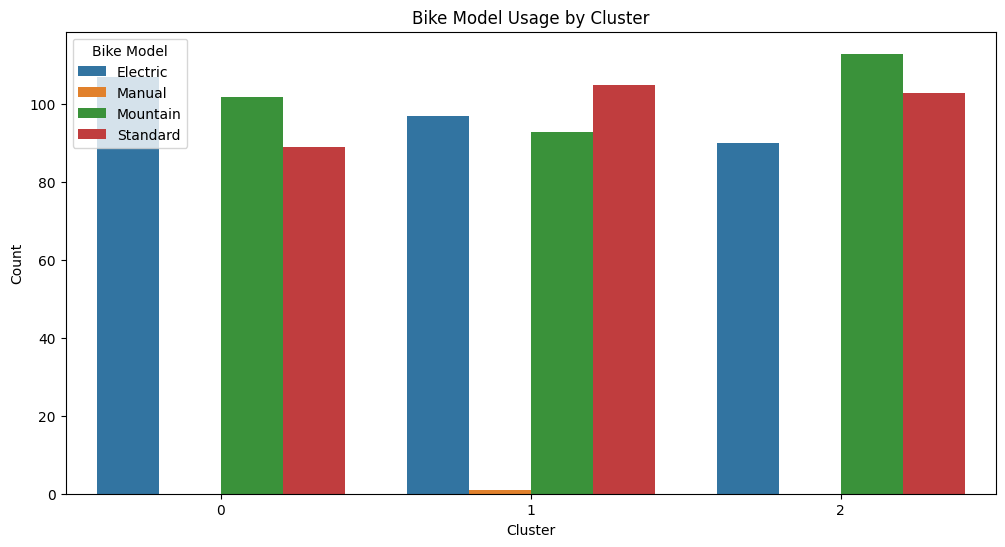

In [269]:
# Group by Cluster and Bike Model

# After running the algo in the procesed dataset Lets come back to the non-processed dataset for simplicity
# Adding the clusters in original dataset
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Grouping
bike_usage = df.groupby(['Cluster', 'Bike Model']).size().reset_index(name='Count')

# Getting % of each cluster
bike_usage['Percentage'] = (
    bike_usage.groupby('Cluster')['Count']
    .transform(lambda x: (x / x.sum()) * 100)
)

print("Bike Usage by Cluster (with Percentages):")
bike_usage

# Plotting bike models for each cluster

plt.figure(figsize=(12, 6))
sns.barplot(data=bike_usage, x='Cluster', y='Count', hue='Bike Model')
plt.title('Bike Model Usage by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Bike Model')
plt.show()



### Summary 

Based on our results, lets see the 3 clusters clearly in an new structured dataset

In [270]:
# Summary df
summary_df = pd.DataFrame()

# Each cluster bike mode
most_common_bike = (
    df.groupby('Cluster')['Bike Model']
    .agg(lambda x: x.value_counts().idxmax())
    .rename('Bike Model')
)

# AVG Rider Age and Distance for each cluster
avg_rider_age = df.groupby('Cluster')['Rider Age'].mean().rename('Rider Age (Avg)')
avg_distance = df.groupby('Cluster')['Distance Covered (km)'].mean().rename('Distance Covered (Avg)')

# concating into summary df
summary_df = pd.concat([most_common_bike, avg_rider_age, avg_distance], axis=1).transpose()

summary_df.index = ['Bike Model', 'Rider Age (Avg)', 'Distance Covered (Avg)']

summary_df


Cluster,0,1,2
Bike Model,Electric,Standard,Mountain
Rider Age (Avg),50.699067,39.321141,28.073812
Distance Covered (Avg),14.229583,32.726824,13.692552


In [271]:
# Validation metrics
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
calinski_harabasz = calinski_harabasz_score(X_scaled, df['Cluster'])

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.3f}")


Silhouette Score: 0.372
Calinski-Harabasz Score: 677.617


### Unsupervised Learning Conclusion

Now we see something different, mayme this project was meant to be like this, to make us reach this point where no Supervised learning outcome will be valid but an Unsupervised one.

As we saw early in this project, there are three main clusters in this dataset:

Rider Age  ------------------ Distance Covered (km) -------- Bike Model

**A.**  50.699067        -----------------      14.229583 ----------------- Electric

**B.**  39.321141      ----------------        32.726824 ----------------- Standard 

**C.**  28.073812         --------------     13.692552 ---------------- Mountain

This case is the age, three different groups of age where we can specify marketing campaigns or promos specifically for each of them.


Due to time we will stop here, but it would be a great idea to make a 2.0 version of this project based on the findings we found.

## References

See report for full list

Malato, G. (2023). An Introduction to the Shapiro-Wilk Test for Normality | Built In. [online] builtin.com. Available at: https://builtin.com/data-science/shapiro-wilk-test.

GeeksforGeeks. (2020). Python - Pearson’s Chi-Square Test. [online] Available at: https://www.geeksforgeeks.org/python-pearsons-chi-square-test/.

Raman (2019). ML | Linear Discriminant Analysis. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/ml-linear-discriminant-analysis/.

